In [4]:
ls drive/MyDrive/KaggleComp/

AutoMLTabular.ipynb  sample_submission.csv  test.csv  train.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
!python3 -m pip install -U pip
!python3 -m pip install -U setuptools wheel
!python3 -m pip install -U "mxnet<2.0.0"
!python3 -m pip install autogluon

     |████████████████████████████████| 1.7 MB 4.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
  Using cached setuptools-60.5.0-py3-none-any.whl (958 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.7.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.31.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |███████

In [6]:
from sklearn.impute   import SimpleImputer
import pandas as pd

train = pd.read_csv('drive/MyDrive/KaggleComp/train.csv')
test = pd.read_csv('drive/MyDrive/KaggleComp/test.csv')
train_columns = [col for col in train.columns.to_list() if col not in ['id']]
data=train[train_columns]


median_impute  = SimpleImputer(strategy='median')
imputed_data = median_impute.fit_transform(data)
imputed_data = pd.DataFrame(imputed_data, columns = data.columns)
train=imputed_data
train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,0.135945,-5.619088,0.0,0.082570,158.386236,4.0,0.734642,0.0
1,186660.0,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1.0,0.127358,102.752988,3.0,0.711531,1.0
2,193213.0,0.140532,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0.0,0.052282,178.685791,3.0,0.425536,0.0
3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0.0,0.035618,128.715630,3.0,0.453597,0.0
4,165969.0,0.493017,0.608234,0.740982,0.002033,10.0,0.094891,-2.684095,0.0,0.050746,121.928157,4.0,0.741311,0.0


In [ ]:
from autogluon.core.features.feature_metadata import FeatureMetadata

fmd = feature_metadata.from_df(train)
fmd

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

time_limit =  800  #seconds the experiment will run for
metric = 'roc_auc'  

label = 'song_popularity'

predictor = TabularPredictor(label, eval_metric=metric, sample_weight='auto_weight').fit(train, time_limit=time_limit, presets='best_quality',ag_args_fit={'num_gpus': 1})

No path specified. Models will be saved in: "AutogluonModels/ag-20220124_105530/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 800s
AutoGluon will save models to "AutogluonModels/ag-20220124_105530/"
AutoGluon Version:  0.3.1
Train Data Rows:    40000
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11630.61 MB
	Train Data (Original)  Memory Usage: 4.16 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. S

In [13]:
results = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.577508       4.711116  168.865039                0.014292          16.253408            2       True         12
1           CatBoost_BAG_L1   0.575513       0.117208   93.347977                0.117208          93.347977            1       True          7
2         LightGBMXT_BAG_L1   0.575506       0.380809   18.158392                0.380809          18.158392            1       True          3
3       WeightedEnsemble_L3   0.575409      16.898377  371.126690                0.014369          11.814359            3       True         21
4           CatBoost_BAG_L2   0.573957      11.876495  307.868808                0.135982          36.496504            2       True         17
5         LightGBMXT_BAG_L2   0.573855      11.859313  285.013455         

In [14]:
import pandas as pd

y_predproba = predictor.predict_proba(test, as_multiclass=False)
submission = pd.read_csv('drive/MyDrive/KaggleComp/'+'sample_submission.csv')
submission['song_popularity'] = y_predproba
submission.to_csv('Auto_gmy_submission.csv', index=False)
submission.head()

,id,song_popularity
0,0,0.345839
1,1,0.461513
2,2,0.272741
3,3,0.342648
4,4,0.351582


#### CHAOS

In [ ]:
# train_data = TabularDataset( 'drive/MyDrive/KaggleComp/train.csv')
# train_data = train_data.drop(columns='id')
# train_data.head()

In [6]:
# test_data = TabularDataset( 'drive/MyDrive/KaggleComp/test.csv')
# test_data = test_data.drop(columns='id')
# test_data.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,308523.0,0.019845,NaN,0.908939,0.001438,NaN,0.112832,-8.890172,0,0.082714,126.129304,4,0.399620
1,200011.0,0.070119,0.731256,0.444655,0.002020,10.0,0.139040,-6.301214,0,0.061685,86.448149,3,0.499424
2,279758.0,0.810637,0.568858,0.125466,0.898841,0.0,0.226614,-11.542478,0,0.041868,99.544351,3,0.564951
3,249197.0,NaN,0.871789,0.557342,0.000715,4.0,0.325391,-7.905546,1,0.046815,123.063854,4,0.906485
4,NaN,0.765568,0.624687,0.710794,0.000346,8.0,0.308284,NaN,0,0.129284,88.703121,3,0.935571


In [11]:
time_limit = 6000  #seconds the experiment will run for
metric = 'roc_auc'  

label = 'song_popularity'

predictor = TabularPredictor(label, eval_metric=metric).fit(train_data, time_limit=time_limit, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220120_094440/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 6000s
AutoGluon will save models to "AutogluonModels/ag-20220120_094440/"
AutoGluon Version:  0.3.1
Train Data Rows:    40000
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11132.75 MB
	Train Data (Original)  Memory Usage: 4.16 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set 

ValueError: ignored

In [12]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  binary
AutoGluon identified the following types of features:
('float', [])     : 11 | ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', ...]
('int', [])       :  1 | ['time_signature']
('int', ['bool']) :  1 | ['audio_mode']


In [16]:
results = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.580109      29.595508  4560.765215                0.014181          15.175774            3       True         26
1       WeightedEnsemble_L2   0.579478      13.296629  3206.183639                0.013877          17.963705            2       True         14
2         LightGBMXT_BAG_L2   0.577819      20.743041  3310.919984                0.134037          10.447708            2       True         15
3           CatBoost_BAG_L2   0.577537      20.651701  3325.677992                0.042698          25.205715            2       True         19
4         LightGBMXT_BAG_L1   0.577401       0.764452    36.631458                0.764452          36.631458            1       True          3
5           CatBoost_BAG_L1   0.576562       0.122189   112.287146  

In [17]:
# randomly sampling 30% rows
val_data_lab = train_data.sample(n=int(len(train_data)*0.3), random_state=0)
predictor.leaderboard(val_data_lab, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,1.000000,0.504178,0.115693,0.312419,0.213880,0.115693,0.312419,0.213880,1,True,2
1,RandomForestGini_BAG_L1,1.000000,0.549263,1.000157,1.742409,25.791445,1.000157,1.742409,25.791445,1,True,5
2,ExtraTreesGini_BAG_L1,1.000000,0.548305,1.565483,2.596430,6.846162,1.565483,2.596430,6.846162,1,True,8
3,ExtraTreesEntr_BAG_L1,1.000000,0.545647,1.742474,2.779618,7.857078,1.742474,2.779618,7.857078,1,True,9
4,RandomForestEntr_BAG_L1,1.000000,0.554914,0.995079,1.684150,50.528773,0.995079,1.684150,50.528773,1,True,6
5,ExtraTreesGini_BAG_L2,0.853204,0.562795,34.103296,22.563269,3309.444012,1.137768,1.954266,8.971736,2,True,20
6,LightGBMLarge_BAG_L1,0.840037,0.573645,1.845649,0.625476,46.596195,1.845649,0.625476,46.596195,1,True,13
7,ExtraTreesEntr_BAG_L2,0.812095,0.564018,35.625070,22.560880,3311.048932,2.659543,1.951877,10.576655,2,True,21
8,CatBoost_BAG_L2,0.805781,0.577537,33.029013,20.651701,3325.677992,0.063485,0.042698,25.205715,2,True,19
9,WeightedEnsemble_L2,0.770121,0.579478,27.640414,13.296629,3206.183639,0.011912,0.013877,17.963705,2,True,14


In [21]:
# predictor = TabularPredictor.load(save_path) 
val_data = val_data_lab.drop(columns = ['song_popularity'])
y_test = val_data_lab['song_popularity']
y_pred = predictor.predict(val_data)
print("Predictions:  \n", y_pred)

Predictions:  
 12836    0
10913    0
4214     0
8198     0
31403    0
        ..
6232     0
26649    0
22126    0
21050    0
8844     0
Name: song_popularity, Length: 12000, dtype: int64


TypeError: ignored

In [24]:
y_pred.value_counts()

0    11906
1       94
Name: song_popularity, dtype: int64

### testfile creation

In [27]:
import pandas as pd


y_predproba = predictor.predict_proba(test_data, as_multiclass=False)
submission = pd.read_csv('drive/MyDrive/KaggleComp/'+'sample_submission.csv')
submission['song_popularity'] = y_predproba
submission.to_csv('Auto_gmy_submission.csv', index=False)
submission.head()


,id,song_popularity
0,0,0.416281
1,1,0.455700
2,2,0.238047
3,3,0.350880
4,4,0.345320


### Pycaret

In [23]:
!pip install pycaret[full]
!pip install scikit-learn==0.23.2

     |████████████████████████████████| 100 kB 3.7 MB/s 
     |████████████████████████████████| 52 kB 878 kB/s 
     |████████████████████████████████| 305 kB 13.4 MB/s 
     |████████████████████████████████| 308 kB 48.0 MB/s 
     |████████████████████████████████| 871 kB 45.0 MB/s 
     |████████████████████████████████| 173.6 MB 7.8 kB/s 
     |████████████████████████████████| 564 kB 44.7 MB/s 
     |████████████████████████████████| 13.4 MB 36.0 MB/s 
     |████████████████████████████████| 131 kB 55.0 MB/s 
     |████████████████████████████████| 40 kB 5.6 MB/s 
     |████████████████████████████████| 59 kB 6.6 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 73 kB 2.3 MB/s 
     |████████████████████████████████| 57.6 MB 1.2 MB/s 
     |████████████████████████████████| 177 kB 41.0 MB/s 
     |████████████████████████████████| 356 kB 36.1 MB/s 
     |████████████████████████████████| 6.6 MB 39.4 MB/s 
     |█████████████████

In [7]:
import sklearn
sklearn.__version__

'0.23.2'

In [8]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from pycaret.classification import *

In [9]:
train_set= pd.read_csv('drive/MyDrive/KaggleComp/train.csv',index_col= 'id')
test_set = pd.read_csv('drive/MyDrive/KaggleComp/test.csv', index_col= 'id')
sample_submission = pd.read_csv('drive/MyDrive/KaggleComp/sample_submission.csv')

In [10]:
train_set.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
id,,,,,,,,,,,,,,
0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [11]:
setup(data = train_set, 
      target = 'song_popularity',
      numeric_imputation = 'median',
      fold=5,
      silent = True, 
     )

,Description,Value
0,session_id,8491
1,Target,song_popularity
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(40000, 14)"
5,Missing Values,True
6,Numeric Features,10
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


(       song_duration_ms  acousticness  ...  time_signature_4  time_signature_5
 id                                     ...                                    
 6725           207968.0      0.057178  ...               0.0               1.0
 30867          183731.0      0.009354  ...               1.0               0.0
 26185          186638.0      0.868174  ...               0.0               0.0
 19668          158913.0      0.091617  ...               0.0               0.0
 17885          177885.0      0.175290  ...               0.0               0.0
 ...                 ...           ...  ...               ...               ...
 36375          199208.0      0.021452  ...               0.0               0.0
 15618          181560.0      0.086598  ...               1.0               0.0
 36722          268155.0      0.025142  ...               0.0               0.0
 13317          191281.0      0.016472  ...               1.0               0.0
 30789          187901.0      0.140295  

In [22]:
best_model = compare_models(sort = 'AUC', n_select = 3, use_gpu = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6357,0.5711,0.0158,0.4371,0.0304,0.0054,0.0179,7.192
ada,Ada Boost Classifier,0.6348,0.5630,0.0417,0.4630,0.0763,0.0173,0.0379,1.708
lightgbm,Light Gradient Boosting Machine,0.6318,0.5606,0.0670,0.4495,0.1165,0.0248,0.0431,0.698
lda,Linear Discriminant Analysis,0.6367,0.5556,0.0067,0.4550,0.0132,0.0025,0.0133,0.172
rf,Random Forest Classifier,0.6281,0.5468,0.0677,0.4201,0.1165,0.0179,0.0299,5.748
et,Extra Trees Classifier,0.6251,0.5335,0.0918,0.4230,0.1507,0.0245,0.0365,3.346
nb,Naive Bayes,0.6338,0.5286,0.0241,0.4183,0.0456,0.0061,0.0166,0.066
dt,Decision Tree Classifier,0.5381,0.5051,0.3852,0.3688,0.3768,0.0101,0.0101,0.446
knn,K Neighbors Classifier,0.5708,0.5050,0.2616,0.3699,0.3063,0.0088,0.0090,0.554
qda,Quadratic Discriminant Analysis,0.4923,0.5016,0.5353,0.3575,0.3886,0.0022,0.0013,0.104


In [11]:
# single model tuning
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6288,0.5546,0.0624,0.4491,0.1096,0.0223,0.0399
1,0.6318,0.5633,0.0751,0.4812,0.1300,0.0345,0.0589
2,0.6270,0.5534,0.0751,0.4438,0.1285,0.0252,0.0415
3,0.6268,0.5511,0.0839,0.4479,0.1413,0.0292,0.0461
4,0.6255,0.5658,0.0713,0.4294,0.1222,0.0202,0.0335
Mean,0.6280,0.5577,0.0736,0.4503,0.1263,0.0263,0.0440
SD,0.0022,0.0058,0.0069,0.0170,0.0104,0.0051,0.0085


In [14]:
lightgbm = tune_model(lightgbm, optimize='AUC' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6339,0.5743,0.0,0.0,0.0,0.0,0.0
1,0.6339,0.5756,0.0,0.0,0.0,0.0,0.0
2,0.6339,0.5563,0.0,0.0,0.0,0.0,0.0
3,0.6339,0.5645,0.0,0.0,0.0,0.0,0.0
4,0.6340,0.5677,0.0,0.0,0.0,0.0,0.0
Mean,0.6340,0.5677,0.0,0.0,0.0,0.0,0.0
SD,0.0000,0.0070,0.0,0.0,0.0,0.0,0.0


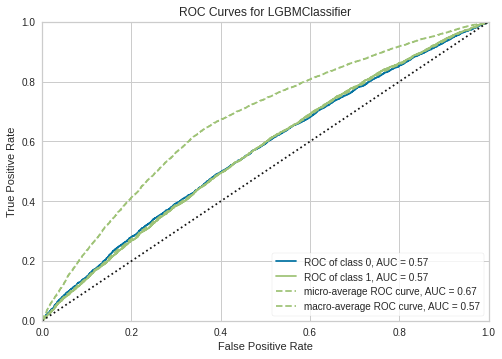

In [10]:
plot_model(lightgbm, plot = 'auc')

#### Blendtest

In [15]:
blended = blend_models(estimator_list = best_model, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6307,0.5727,0.0317,0.4392,0.0591,0.0104,0.0250
1,0.6330,0.5756,0.0410,0.4855,0.0756,0.0197,0.0443
2,0.6318,0.5556,0.0483,0.4714,0.0876,0.0210,0.0432
3,0.6302,0.5614,0.0424,0.4462,0.0775,0.0149,0.0316
4,0.6335,0.5703,0.0444,0.4919,0.0815,0.0222,0.0483
Mean,0.6318,0.5671,0.0416,0.4668,0.0763,0.0176,0.0385
SD,0.0013,0.0075,0.0055,0.0209,0.0095,0.0044,0.0087


In [16]:
# Well calibrated classifiers are probabilistic classifiers for which the probability output can be directly interpreted as a confidence level.

calibrated_blended = calibrate_model(blended)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6332,0.5713,0.0059,0.4286,0.0115,0.0017,0.0092
1,0.6336,0.5782,0.0044,0.4500,0.0087,0.0016,0.0104
2,0.6325,0.5574,0.0156,0.4444,0.0302,0.0055,0.0186
3,0.6350,0.5637,0.0122,0.5682,0.0239,0.0086,0.0373
4,0.6344,0.5721,0.0088,0.5294,0.0173,0.0054,0.0265
Mean,0.6337,0.5686,0.0094,0.4841,0.0183,0.0046,0.0204
SD,0.0009,0.0072,0.0041,0.0547,0.0079,0.0026,0.0105


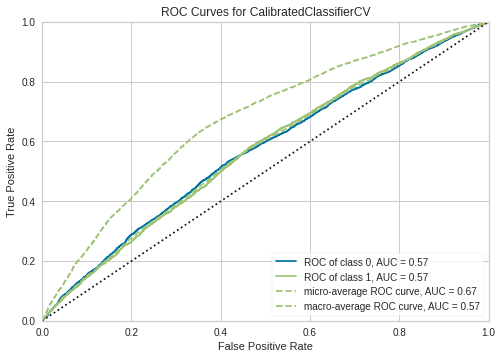

In [17]:
plot_model(calibrated_blended, plot = 'auc')

In [28]:
### Submission
predictions = predict_model(lightgbm, data = test_set, raw_score=True,)
predictions.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Label,Score_0,Score_1
id,,,,,,,,,,,,,,,,
0,308523.0,0.019845,NaN,0.908939,0.001438,NaN,0.112832,-8.890172,0,0.082714,126.129304,4,0.399620,0,0.6163,0.3837
1,200011.0,0.070119,0.731256,0.444655,0.002020,10.0,0.139040,-6.301214,0,0.061685,86.448149,3,0.499424,0,0.5987,0.4013
2,279758.0,0.810637,0.568858,0.125466,0.898841,0.0,0.226614,-11.542478,0,0.041868,99.544351,3,0.564951,0,0.6669,0.3331
3,249197.0,NaN,0.871789,0.557342,0.000715,4.0,0.325391,-7.905546,1,0.046815,123.063854,4,0.906485,0,0.6533,0.3467
4,NaN,0.765568,0.624687,0.710794,0.000346,8.0,0.308284,NaN,0,0.129284,88.703121,3,0.935571,0,0.6415,0.3585


In [29]:
predictions['Score_0']

id
0       0.6163
1       0.5987
2       0.6669
3       0.6533
4       0.6415
         ...  
9995    0.6405
9996    0.6541
9997    0.6285
9998    0.5982
9999    0.6651
Name: Score_0, Length: 10000, dtype: float64

In [26]:
lightgbm.predicted_probability (test_set )

AttributeError: ignored

In [31]:
sample_submission['song_popularity'] = predictions['Score_1']
sample_submission.to_csv(f'lgbmpycaret_submission.csv',index=False)

# Stacking randomly:

In [19]:

from pycaret.classification import *


# creating individual models for stacking
adaboost = create_model('ada')
catboost = create_model('catboost')
gbc = create_model('gbc')
lightgbm = create_model('lightgbm')
rf = create_model('rf')

# meta model using preds from above 4
xgboost = create_model('xgboost')

# stacking models
stacker = stack_models(estimator_list = [adaboost,catboost,gbc,lightgbm, rf], meta_model = xgboost)

# stack models dynamically
top5 = compare_models(n_select = 5)
stacker = stack_models(estimator_list = top5[1:], meta_model = top5[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6336,0.5628,0.0419,0.4450,0.0765,0.0151,0.0322
1,0.6339,0.5648,0.0330,0.4379,0.0614,0.0111,0.0262
2,0.6341,0.5737,0.0379,0.4477,0.0699,0.0141,0.0315
3,0.6396,0.5609,0.0428,0.5404,0.0794,0.0276,0.0636
4,0.6326,0.5529,0.0527,0.4440,0.0942,0.0187,0.0359
Mean,0.6348,0.5630,0.0417,0.4630,0.0763,0.0173,0.0379
SD,0.0025,0.0067,0.0065,0.0388,0.0109,0.0057,0.0132


ValueError: ignored

In [20]:
import xgboost

In [21]:
import catboost